
# Predict wine quality with 'revoscalepy'


'revoscalepy' is a library provided by Microsoft to support high-performance algorithms for Python. This sample will showcase how to 'revoscalepy" algos for predictive analytics.

This sample will use [wine quality data set](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)
from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html).  
The dataset contains quality ratings (labels) for a 1599 red wine samples. 
The features are the wines' physical and chemical properties (11 predictors). 
This sample will use these properties to predict the quality of the wine. 
The experiment is shown below and can be found in the 
[Cortana Intelligence Gallery](https://gallery.cortanaintelligence.com/Experiment/Predict-Wine-Quality-Classification-10>)

*Sources:* 

- [Predicting Wine Quality with Azure ML and R](http://blog.revolutionanalytics.com/2016/04/predicting-wine-quality.html>)
- [Predicting Wine
  Quality with revoscaler](https://github.com/shaheeng/ClassificationModelEvaluation/blob/master/PredictWineQuality_RevBlog3/Predicting%20Wine%20Quality%20-%20Shaheen.ipynb>)

Processing the data
===================

Let's start with collecting and preparing the data.
We save the data in a single file in order to avoid downloading them
many times.



In [21]:
import matplotlib.pyplot as plt
import pandas
import os

if not os.path.exists("wines_backup.csv"):
    # if not exist, we create wines.csv which combines red and white wines into a single file
    columns = ["facidity", "vacidity", "citric", "sugar", "chlorides", "fsulfur", 
               "tsulfur", "density", "pH", "sulphates", "alcohol", "quality"]
    red = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
                         names=columns, sep=";", skiprows=1)
    white = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
                         names=columns, sep=";", skiprows=1)
    red["color"] = "red"
    white["color"] = "white"
    wines = pandas.concat([white, red])
    wines.to_csv("wines_backup.csv", sep="\t", index=False)
else:
    wines = pandas.read_csv("wines_backup.csv", sep="\t")
    
print(wines.head(n=5))

   facidity  vacidity  citric  sugar  chlorides  fsulfur  tsulfur  density  \
0       7.0      0.27    0.36   20.7      0.045     45.0    170.0   1.0010   
1       6.3      0.30    0.34    1.6      0.049     14.0    132.0   0.9940   
2       8.1      0.28    0.40    6.9      0.050     30.0     97.0   0.9951   
3       7.2      0.23    0.32    8.5      0.058     47.0    186.0   0.9956   
4       7.2      0.23    0.32    8.5      0.058     47.0    186.0   0.9956   

     pH  sulphates  alcohol  quality  color  
0  3.00       0.45      8.8        6  white  
1  3.30       0.49      9.5        6  white  
2  3.26       0.44     10.1        6  white  
3  3.19       0.40      9.9        6  white  
4  3.19       0.40      9.9        6  white  


The goal is to predict the quality of the wines.
Let's see how this variable is distributed.



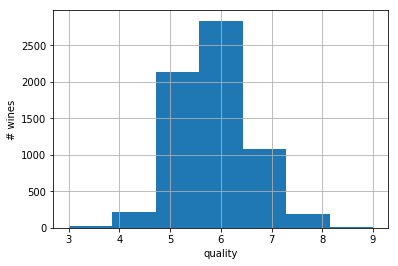

In [22]:
fig, ax = plt.subplots(1, 1)
wines["quality"].hist(bins=7, ax=ax)
ax.set_xlabel("quality")
ax.set_ylabel("# wines")
plt.show()

Is there any differance between red and white wines?



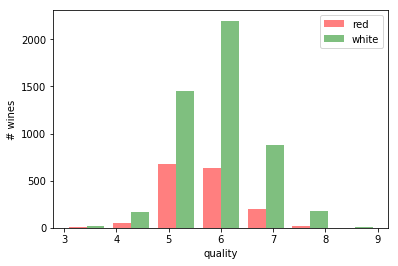

In [23]:
red = wines[wines.color=="red"]["quality"]
white = wines[wines.color=="white"]["quality"]

fig, ax = plt.subplots(1, 1)
ax.hist([red, white], label=["red", "white"], alpha=0.5,
        histtype='bar', bins=7, color=["red", "green"])
ax.legend()
ax.set_xlabel("quality")
ax.set_ylabel("# wines")
plt.show()

There are more white wines and more high quality white wines.
Let's see if the quality is correlated to the alcohol degree?



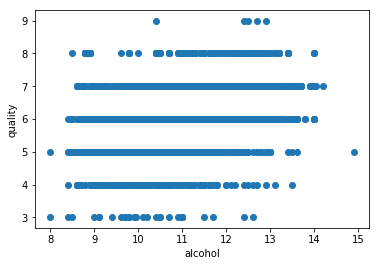

In [24]:
fig, ax = plt.subplots(1, 1)
ax.scatter(x=wines.alcohol, y=wines.quality)
ax.set_xlabel("alcohol")
ax.set_ylabel("quality")
plt.show()

Quite difficult to see don't you think?



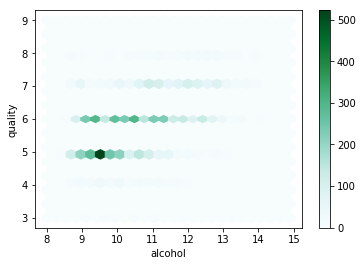

In [25]:
fig, ax = plt.subplots(1, 1)
wines.plot.hexbin(x='alcohol', y='quality', ax=ax, gridsize=25)
plt.show()

The alcohol does not explain the quality all by itself.

Training
===============================

The quality is a mark between 1 and 9.
We use a revoscalepy decision tree algorithm to predict it.
But before anything starts, we need to split the dataset
into train and test.



In [26]:
try:
    from sklearn.model_selection import train_test_split
except ImportError:
    from sklearn.cross_validation import train_test_split
wines_train, wines_test = train_test_split(wines)

And we train. We drop the color which is a non numerical
features.



In [27]:
from revoscalepy import rx_dtree
cols = wines.columns.drop(["quality", "color"])
model = rx_dtree("quality ~" + "+".join(cols), data=wines_train, 
                 method="anova",allow_disk_write = False)


oneFilePerTree is not a logical and is being reset to FALSE

useWriteDataSource is not an integer and is being reset to 0

autoCleanup is not a logical and is being reset to TRUE
Rows Read: 4872, Total Rows Processed: 4872, Total Chunk Time: 0.008 seconds 
Rows Read: 4872, Total Rows Processed: 4872, Total Chunk Time: 0.017 seconds 
Rows Read: 4872, Total Rows Processed: 4872, Total Chunk Time: 0.015 seconds 
Rows Read: 2, Total Rows Processed: 2, Total Chunk Time: 0.004 seconds 
Rows Read: 4872, Total Rows Processed: 4872, Total Chunk Time: 0.016 secondsoneFilePerTree is not a logical and is being reset to FALSE
 
Rows Read: 4, Total Rows Processed: 4, Total Chunk Time: 0.009 seconds 
Rows Read: 4872, Total Rows Processed: 4872, Total Chunk Time: 0.016 seconds 
Rows Read: 8, Total Rows Processed: 8, Total Chunk Time: 0.016 seconds 
Rows Read: 4872, Total Rows Processed: 4872, Total Chunk Time: 0.018 seconds 
Rows Read: 16, Total Rows Processed: 16, Total Chunk Time: 0.033 seconds 
Ro

Now let's evaluate the model accuracy.



In [28]:
from revoscalepy import rx_predict_rx_dtree
pred = rx_predict_rx_dtree(model, wines_test, extra_vars_to_write=["quality"])
print(pred.head())

Rows Read: 1625, Total Rows Processed: 1625, Total Chunk Time: 0.005 seconds 
   quality_Pred  quality
0      6.900000      6.0
1      5.208333      6.0
2      4.777778      5.0
3      5.720000      6.0
4      5.240000      5.0


The column 'quality_Pred' is the prediction.
We estimate its quality with the metric [R2](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)
and we plot them.



R2= 0.314806305768


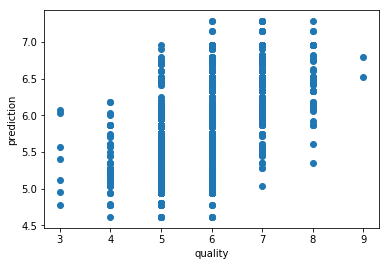

In [29]:
from sklearn.metrics import r2_score
r2 = r2_score(pred.quality, pred.quality_Pred)
print("R2=", r2)

fig, ax = plt.subplots(1, 1)
ax.scatter(x=pred.quality, y=pred.quality_Pred)
ax.set_xlabel("quality")
ax.set_ylabel("prediction")
plt.show()

It is not easy to read.



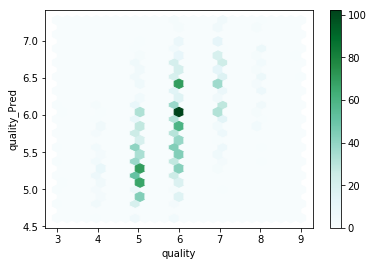

In [30]:
fig, ax = plt.subplots(1, 1)
pred.plot.hexbin(x='quality', y='quality_Pred', ax=ax, gridsize=25)
plt.show()

It seems to be doing a relatively good job to predict
marks 5, 6, 7. 
